# 1. Data Preparation

In [53]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# load dataset 
data = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding="ISO-8859-1")
data

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [56]:
data.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


# 2. Data Cleaning

In [57]:
# Cheking the null values
data.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [58]:
# Droping Rows with missing values
df = data.dropna()
df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


# 3. Exploratory Data Analysis (EDA)

## 3.1 Total Medal Count By Country

In [59]:
# Grouping medals count by country
top_medal_country = df.groupby('Country')['Medal'].count().sort_values(ascending= False)
top_medal_country

Country
United States           1992
Soviet Union            1021
Australia                798
Germany                  691
China                    679
                        ... 
Sri Lanka                  1
Togo                       1
United Arab Emirates       1
Uruguay                    1
Virgin Islands*            1
Name: Medal, Length: 127, dtype: int64

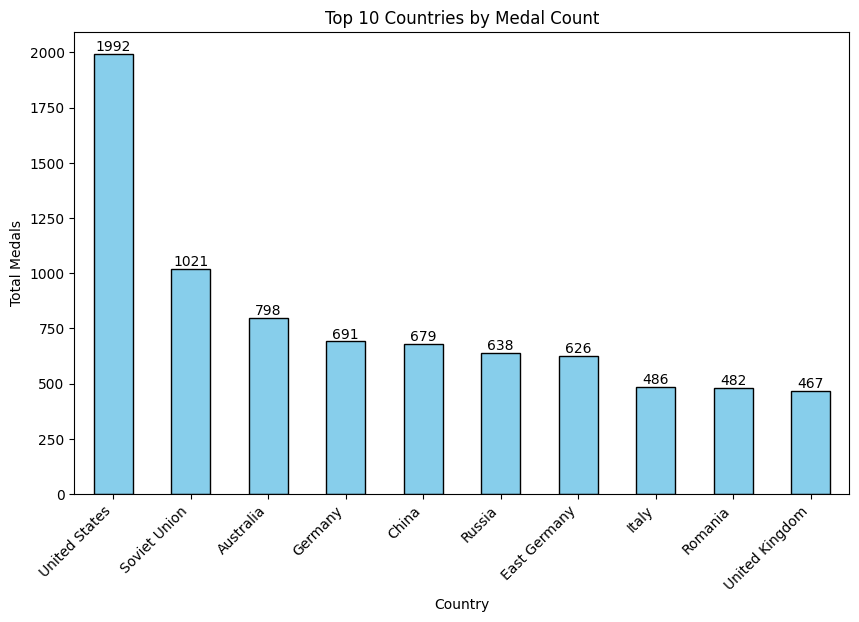

In [60]:
# Top 10 countries by medal
plt.figure(figsize=(10,6))
bars=top_medal_country.head(10).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, ha="right")

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,bar.get_height(), 
             str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=10)
plt.show()

## 3.2 Total Medal Count By Atletes

In [61]:
# Grouping medals count by Athletes
top_medal_atletes = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False)
top_medal_atletes                                                            

Athlete
PHELPS, Michael        16
FISCHER, Birgit        12
TORRES, Dara           12
THOMPSON, Jenny        12
ANDRIANOV, Nikolay     12
                       ..
ZVYAGINTSEV, Viktor     1
ZWEHL, Julia            1
ZWERING, Klaas-Erik     1
ZUEVA, Natalia          1
ZUIJDWEG, Martijn       1
Name: Medal, Length: 11337, dtype: int64

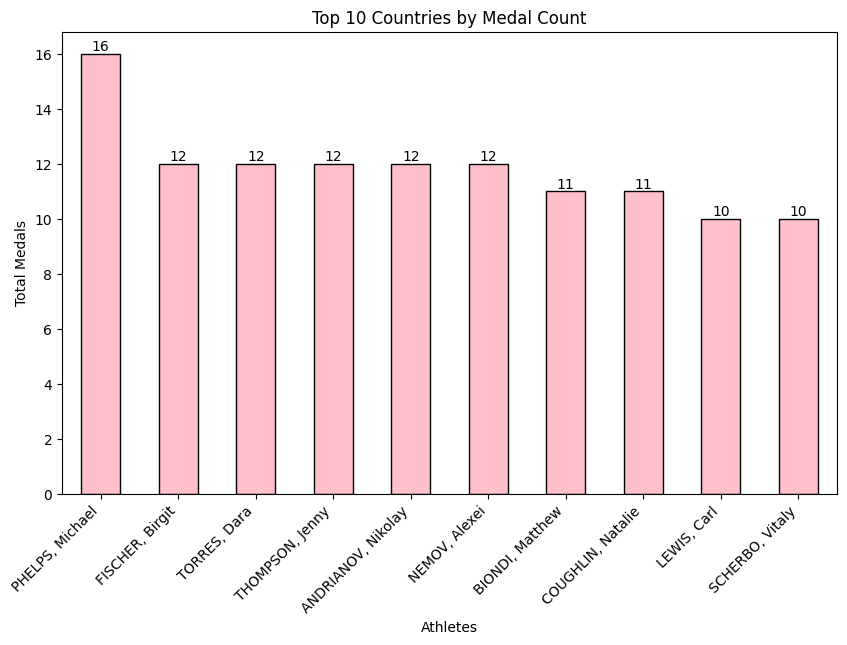

In [62]:
# Top 10 Athletes by medal
plt.figure(figsize=(10,6))
bars=top_medal_atletes.head(10).plot(kind="bar", color="pink", edgecolor="black")
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Athletes')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, ha="right")

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,bar.get_height(), 
             str(int(bar.get_height())), 
             ha='center', va='bottom', fontsize=10)
plt.show()

## 3.3 Medals Won Over the Years

In [63]:
# Grouping by Years and count medal won
medals_won =  df.groupby('Year')['Medal'].count()
medals_won

Year
1976.0    1305
1980.0    1387
1984.0    1459
1988.0    1546
1992.0    1705
1996.0    1859
2000.0    2015
2004.0    1998
2008.0    2042
Name: Medal, dtype: int64

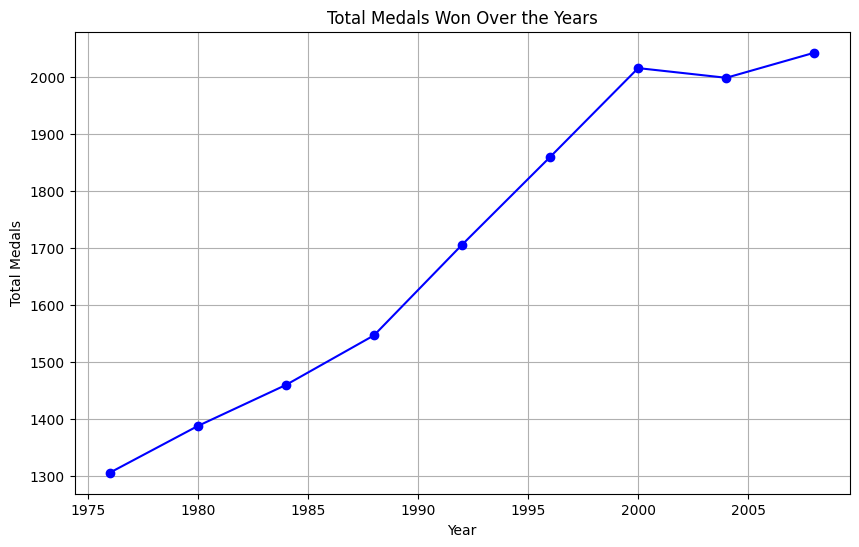

In [64]:
# Plotting the trend of medals won over the years
plt.figure(figsize=(10, 6))
plt.plot(medals_won.index, medals_won.values,marker='o', linestyle='-', color='b')
plt.title("Total Medals Won Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Medals")
plt.grid(True)
plt.show()

## 3.4 Gender Distribution in Events

In [65]:
# Grouping gender distribution by Event
gender_distribution_event = df['Gender'].value_counts()
gender_distribution_event

Gender
Men      9388
Women    5928
Name: count, dtype: int64

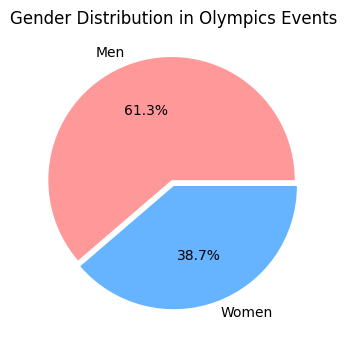

In [66]:
# Plotting the gender distribution in Event
plt.figure(figsize=(6, 4))
gender_distribution_event.plot(kind='pie', autopct='%1.1f%%',colors=['#ff9999','#66b3ff'], explode=[0.05, 0])
plt.title("Gender Distribution in Olympics Events")
plt.ylabel('')
plt.show()

## 3.5 Medal distribution by gender

In [67]:
# Grouping gender distribution by Event
gender_distribution_medal = df.groupby(["Medal", "Gender"]).size().unstack()
gender_distribution_medal

Gender,Men,Women
Medal,,
Bronze,3257,2001
Gold,3080,1962
Silver,3051,1965


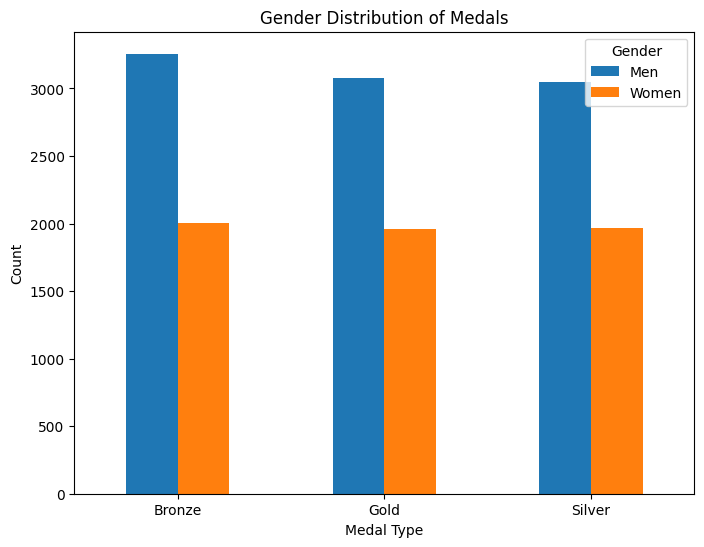

In [68]:
#  Plotting the gender distribution in Medal
gender_distribution_medal.plot(kind="bar", figsize=(8, 6))
plt.xlabel("Medal Type")
plt.ylabel("Count")
plt.title("Gender Distribution of Medals")
plt.legend(title="Gender")
plt.xticks(rotation=0)
plt.savefig('gender_distribution_medal.png', transparent=True)
plt.show()

# 4 Predictive Analysis (Machine Learning)

In [71]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [73]:
df=pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding="ISO-8859-1")

# Encode categorical variables using LabelEncoder

le = LabelEncoder()
df['Country_Code'] = le.fit_transform(df['Country_Code'])
df['Sport'] = le.fit_transform(df['Sport'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Event_gender'] = le.fit_transform(df['Event_gender'])
df['Medal'] = df['Medal'].map({'Gold': 1, 'Silver': 1, 'Bronze': 1,np.nan: 0})

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,0,Diving,3m springboard,"KÖHLER, Christa",1,40,East Germany,1,1
1,Montreal,1976.0,0,Diving,3m springboard,"KOSENKOV, Aleksandr",0,119,Soviet Union,0,1
2,Montreal,1976.0,0,Diving,3m springboard,"BOGGS, Philip George",0,121,United States,0,1
3,Montreal,1976.0,0,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",0,56,Italy,0,1
4,Montreal,1976.0,0,Diving,10m platform,"WILSON, Deborah Keplar",1,121,United States,1,1
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,27,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",0,37,France,0,1
15429,Beijing,2008.0,27,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",0,41,Georgia,0,1
15430,Beijing,2008.0,27,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",0,7,Azerbaijan,0,1
15431,Beijing,2008.0,27,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",0,37,France,0,1


In [75]:
# Features and target
X = df[['Country_Code', 'Sport', 'Gender','Event_gender']]
y = df['Medal']

In [76]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)


In [77]:
# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [81]:
# Predict on the test data
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 1.0
